<a href="https://colab.research.google.com/github/hernandezarturo/nlp_projects/blob/master/Analisis_de_sentimientos_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>


# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [2]:
!pip install flair

     |████████████████████████████████| 337kB 8.2MB/s 
     |████████████████████████████████| 983kB 14.0MB/s 
     |████████████████████████████████| 1.1MB 26.4MB/s 
     |████████████████████████████████| 19.7MB 59.1MB/s 
     |████████████████████████████████| 1.3MB 44.5MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 798kB 39.6MB/s 
     |████████████████████████████████| 890kB 35.7MB/s 
     |████████████████████████████████| 2.9MB 41.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=2bf3dc42ed08d04ef11eb5418584c5891d0374f7d5feaa2e82d2a0eae3820ebc
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for segtok: filename=segtok-1.5.10-cp36-none-any.whl size=25021 sha256=711e7800616f7ee150c674eea5cf1e762b8b3cbbabe52667df99e5c76433069a
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5

In [3]:
from flair.models import TextClassifier
from flair.data import Sentence

In [4]:
ejemplo1 = "At least it isn't a horrible book."
ejemplo2 = "Make sure you :) or :D today!"
ejemplo3 = "Goku is very funny"
ejemplo4 = "Goku is SO FUNNY!!!!!"
ejemplo5 = "Bogota has a metro"

In [5]:
from textblob import TextBlob 

TextBlob(ejemplo3).sentiment

Sentiment(polarity=0.325, subjectivity=1.0)

In [6]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(ejemplo1)

print(ejemplo4)

classifier.predict(sentence, multi_class_prob=False)
l = sentence.labels

l[0].value, l[0].score

2020-11-20 20:47:58,532 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmpfu9xvuq0


100%|██████████| 266147697/266147697 [00:15<00:00, 17362141.13B/s]

2020-11-20 20:48:14,340 copying /tmp/tmpfu9xvuq0 to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2020-11-20 20:48:15,289 removing temp file /tmp/tmpfu9xvuq0
2020-11-20 20:48:15,832 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt



Goku is SO FUNNY!!!!!


('POSITIVE', 0.8074582815170288)

In [7]:
classifier = TextClassifier.load('sentiment')
sentence = Sentence("Instalar Pytorch es un dolor de cabeza, lo odio")
classifier.predict(sentence)
sentence.labels

2020-11-20 20:48:20,861 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


[NEGATIVE (0.9438)]

In [8]:
!pip install sentiment-analysis-spanish

     |████████████████████████████████| 15.1MB 329kB/s 


In [9]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()
sentiment.sentiment("me encanta la clase!")

0.8723769

In [10]:
import pandas as pd
import tweepy
import PIL.Image

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [11]:
from google.colab import files
uploaded = files.upload()

Saving llaves.csv to llaves.csv


In [12]:
import io

keys = pd.read_csv(io.BytesIO(uploaded['llaves.csv']),sep =';', header=None) 
keys = dict(zip(keys[0],keys[1]))

In [13]:
# Autorizar a través API

auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
api.update_status('Hoy 19 de Noviembre usando API Twitter para este post 😀')

Status(_api=<tweepy.api.API object at 0x7f3396b63908>, _json={'created_at': 'Fri Nov 20 02:29:43 +0000 2020', 'id': 1329612861358841858, 'id_str': '1329612861358841858', 'text': 'Hoy 19 de Noviembre usando API Twitter para este post 😀', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1628454504, 'id_str': '1628454504', 'name': 'Arturo Hernández', 'screen_name': 'Arturo_hernanca', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 45, 'friends_count': 159, 'listed_count': 0, 'created_at': 'Sun Jul 28 18:33:13 +0000 2013', 'favourites_count': 1424, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1586, 'lang': None, 'contributo

In [14]:
uploaded = files.upload()

Saving co_small.csv to co_small.csv


In [15]:
ciudades = pd.read_csv("co_small.csv", sep = ',')
ciudades

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Bogotá,4.649178,-74.062827,Colombia,CO,Bogotá,primary,7772000.0,6333661.0
1,Medellín,6.251840,-75.563591,Colombia,CO,Antioquia,admin,3297000.0,1999979.0
2,Cali,3.437222,-76.522500,Colombia,CO,Valle del Cauca,admin,2254000.0,2178836.0
3,Barranquilla,10.963889,-74.796389,Colombia,CO,Atlántico,admin,1798000.0,1244491.0
4,Bucaramanga,7.125393,-73.119804,Colombia,CO,Santander,admin,1009000.0,571820.0
5,Cartagena,10.399722,-75.514444,Colombia,CO,Bolívar,admin,887000.0,887000.0
6,Cúcuta,7.893907,-72.507821,Colombia,CO,Norte de Santander,admin,722146.0,721398.0
7,Pereira,4.813333,-75.696111,Colombia,CO,Risaralda,admin,568750.0,440118.0
8,Santa Marta,11.240791,-74.199040,Colombia,CO,Magdalena,admin,431781.0,402641.0
9,Ibagué,4.438889,-75.232222,Colombia,CO,Tolima,admin,421685.0,408627.0


In [17]:
all_tweets = [] 
 
for ciudad in ciudades.iterrows():
    c = ciudad[1]
    gc = f"{c.lat},{c.lng},100km"
    c_name = c.city
    tweets = tweepy.Cursor(api.search,
                           q=['PEKERMAN -RT'],
                           lang='es',
                           geocode=gc,
                           tweet_mode='extended',
                           include_rts=False).items(1000)
    t = []
 
    for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)
        temp.append(tweet.created_at)
        temp.append(c_name)
        temp.append(tweet.user.location)
        temp.append(tweet.id)
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
        t.append(temp)
           
    all_tweets.extend(t)
    print(c_name)

Bogotá
Medellín
Cali
Barranquilla
Bucaramanga
Cartagena
Cúcuta
Pereira
Santa Marta
Ibagué
Pasto
Manizales
Villavicencio
Neiva
Armenia
Valledupar
Montería
Sincelejo
Popayán
Tunja
Ríohacha
Florencia
Quibdó
Arauca
Yopal
Leticia
San Andrés
San José del Guaviare
Mocoa
Puerto Carreño
Mitú
Inírida


In [18]:
data = pd.DataFrame(all_tweets)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweet,date,city,user_location,id,link
0,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:33:55,Bogotá,"Bogotá, D.C., Colombia",1329900808977211395,https://twitter.com/i/web/status/1329900808977...
1,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:29:36,Bogotá,"Bogotá, D.C., Colombia",1329899721805193218,https://twitter.com/i/web/status/1329899721805...
2,@nicolaslealb @lauracnavarrop Pékerman!!!!,2020-11-20 21:29:22,Bogotá,Bogotá,1329899660266381316,https://twitter.com/i/web/status/1329899660266...
3,@PKminosa1 @lcvelez La rata papá de este imbec...,2020-11-20 21:24:38,Bogotá,Bogotá,1329898473194479621,https://twitter.com/i/web/status/1329898473194...
4,Para quienes no saben o conocen que es @Marcel...,2020-11-20 20:41:32,Bogotá,"Bogotá, Colombia",1329887622982930441,https://twitter.com/i/web/status/1329887622982...


In [19]:
data = data[['tweet', 'date', 'city']]
data

,tweet,date,city
0,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:33:55,Bogotá
1,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:29:36,Bogotá
2,@nicolaslealb @lauracnavarrop Pékerman!!!!,2020-11-20 21:29:22,Bogotá
3,@PKminosa1 @lcvelez La rata papá de este imbec...,2020-11-20 21:24:38,Bogotá
4,Para quienes no saben o conocen que es @Marcel...,2020-11-20 20:41:32,Bogotá
...,...,...,...
19821,@FCFSeleccionCol Siempre pensé que después de ...,2020-11-17 22:08:55,Inírida
19822,Pekerman llegó a la Selección Colombia e hizo...,2020-11-17 21:54:48,Inírida
19823,"Dejen de pedir a Pekerman, ese triplehijueputa...",2020-11-17 21:51:45,Inírida
19824,JAJAJAJAJAJAJAJA\nPekerman nos clasificó al úl...,2020-11-13 22:57:49,Inírida


In [20]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [22]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,city,clean,links,hashtags,mentions
0,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:33:55,Bogotá,pekerman borro la rosca que tenian ante...,[],[],"[@ESPNColombia, @AndreaGuerreroQ, @DanielAngul..."
1,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:29:36,Bogotá,"x favor no insista con osorio marroco ,...",[],[],"[@ESPNColombia, @AndreaGuerreroQ, @DanielAngul..."
2,@nicolaslealb @lauracnavarrop Pékerman!!!!,2020-11-20 21:29:22,Bogotá,Pékerman!!!!,[],[],"[@nicolaslealb, @lauracnavarrop]"
3,@PKminosa1 @lcvelez La rata papá de este imbec...,2020-11-20 21:24:38,Bogotá,La rata papá de este imbecil hizo todo lo po...,[],[],"[@PKminosa1, @lcvelez]"
4,Para quienes no saben o conocen que es @Marcel...,2020-11-20 20:41:32,Bogotá,Para quienes no saben o conocen que es Es el ...,[https://t.co/ZcL8uzUSy4],[],"[@MarceloRoffe, @FCFSeleccionCol, @fdbedout, @..."


In [23]:
classifier = TextClassifier.load('sentiment')

def sent_flair(clean):
    sentence = Sentence(clean)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sent_flair'] = data['clean'].apply(lambda valor: sent_flair(valor))
data.head()

2020-11-21 00:57:16,817 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


,tweet,date,city,clean,links,hashtags,mentions,sent_flair
0,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:33:55,Bogotá,pekerman borro la rosca que tenian ante...,[],[],"[@ESPNColombia, @AndreaGuerreroQ, @DanielAngul...",-0.706095
1,@ESPNColombia @AndreaGuerreroQ @DanielAnguloR ...,2020-11-20 21:29:36,Bogotá,"x favor no insista con osorio marroco ,...",[],[],"[@ESPNColombia, @AndreaGuerreroQ, @DanielAngul...",0.646817
2,@nicolaslealb @lauracnavarrop Pékerman!!!!,2020-11-20 21:29:22,Bogotá,Pékerman!!!!,[],[],"[@nicolaslealb, @lauracnavarrop]",0.986572
3,@PKminosa1 @lcvelez La rata papá de este imbec...,2020-11-20 21:24:38,Bogotá,La rata papá de este imbecil hizo todo lo po...,[],[],"[@PKminosa1, @lcvelez]",-0.728042
4,Para quienes no saben o conocen que es @Marcel...,2020-11-20 20:41:32,Bogotá,Para quienes no saben o conocen que es Es el ...,[https://t.co/ZcL8uzUSy4],[],"[@MarceloRoffe, @FCFSeleccionCol, @fdbedout, @...",0.974403


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [25]:
sentimientos = data[['clean', 'sent_flair']].sort_values('sent_flair')

In [26]:
sentimientos.head(5)

,clean,sent_flair
11693,El tweet hace referencia a la postura que tom...,-0.999996
19610,El tweet hace referencia a la postura que tom...,-0.999996
7782,"Hombre, dejen a Pekerman ya quieto. Entonces ...",-0.999995
53,"Hombre, dejen a Pekerman ya quieto. Entonces ...",-0.999995
5783,"Hombre, dejen a Pekerman ya quieto. Entonces ...",-0.999995


In [27]:
sentimientos.tail(5)

,clean,sent_flair
13045,Con Pekerman éramos 3-5-9 pero todo cambia,0.999931
18699,Vengo a activarles un recuerdo.\nNómina:\nOspi...,0.999938
14851,Vengo a activarles un recuerdo.\nNómina:\nOspi...,0.999938
16841,Vengo a activarles un recuerdo.\nNómina:\nOspi...,0.999938
1360,Vengo a activarles un recuerdo.\nNómina:\nOspi...,0.999938


**El tuit más negativo:**

In [28]:
data.loc[11693]['clean']

' El tweet hace referencia a la postura que tomaron algunos periodistas en contra del proceso del señor Pékerman y cuando comenzó con 4 puntos en 4 juegos a Rusia y terminó décimo en ese Mundial (octavos de final).\nNuméricamente hoy no están eliminados, ni en Qatar.'

**El tuit más positivo:**

In [75]:
data.loc[1360]['clean']

'Vengo a activarles un recuerdo.\nNómina:\nOspina\nZúñiga, Zapata, Yepes, Miñia\nLa roca Sánchez y Aguilar\nCuadrado y James\nTeo y Falcao\nDT: don José\nNarrador: Javi Fernández\nPóker y Águila: a $1.500\n¡Éramos felices y yo si lo sabía!     '

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [78]:
positivas= sentimientos[sentimientos.sent_flair> 0]
print("Tuits postivos de Pekerman descargados:", len(positivas))

Tuits postivos de Pekerman descargados: 11052


In [79]:
negativas = sentimientos[sentimientos.sent_flair< 0]
print("Tuits negativos de Pekerman descargados:", len(negativas))

Tuits negativos de Pekerman descargados: 8774


In [81]:
print("Total de tuis desgargados:",len(sentimientos))

Total de tuis desgargados: 19826


###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

Se realiza grafico de emojis de los tuits realizados

In [45]:
!pip install emoji

     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=55a6c086d1601e5f89b896bb590bea39cc5b0ac799caab8cab6464e8365efc82
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [48]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [51]:
from collections import Counter
import emoji

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis

,emoji,cnt
5,😂,986
7,🇨🇴,312
35,😭,258
38,🤣,218
22,🥺,149
...,...,...
189,😵,1
190,😑,1
191,😠,1
192,👌🏽,1


In [53]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt

In [54]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

**NUBE DE PALABRAS DE CADA SENTIMIENTO**

In [65]:
import nltk
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

NUBE DE PALABRAS POSITIVAS

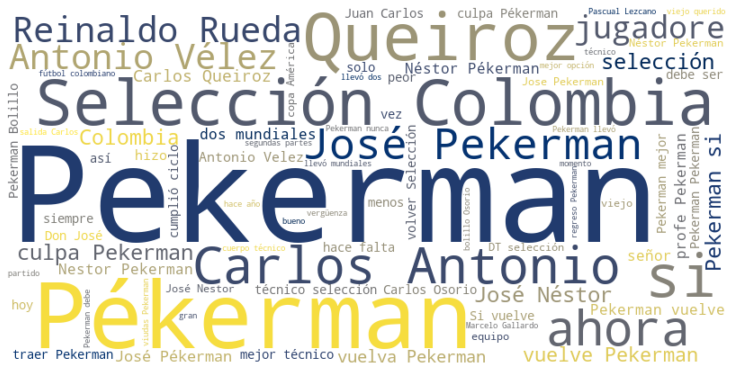

In [84]:
palabras = positivas.clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=80,
                     background_color='white', colormap='cividis',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

NUBE DE PALABRAS NEGATIVAS

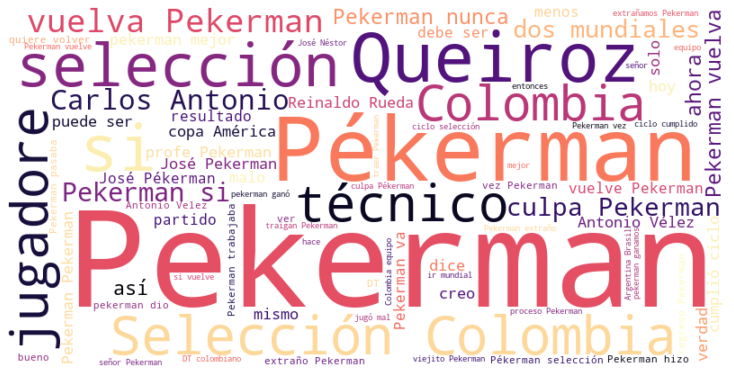

In [85]:
palabras = negativas.clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=80,
                     background_color='white', colormap='magma',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()